This notebook for plotting tracer transport and budget diagnsotics for NAO-based composites.

In [1]:
import xarray as xr
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import glob

import matplotlib.image as image
import matplotlib.patches as patches

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmaps
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import warnings
warnings.filterwarnings("ignore")

## Figure: Overturning and tracer transport anomalies

Timseries of anomalies in the meridional overturning and tracer transport after the NAO onset.

In [3]:
ppdir = ("/gws/nopw/j04/unicorns/carbon_add_redis" + 
         "/Fast_SLow_NAO/MOHC/UKESM1-0-LL/historical/")

var_list = ['thetao', 'dissic']

ds = []
for var in var_list:
    d = xr.open_dataset(ppdir + "all_ensembles/Timeseries/" + var + "_Transport_Atlantic.nc")
    d = d.drop('time').assign_coords(time=d['time.year'] + d['time.month']/12 - 1902)
    d = d.assign_coords(lat=d['latitude'].values)
    ds.append(d)

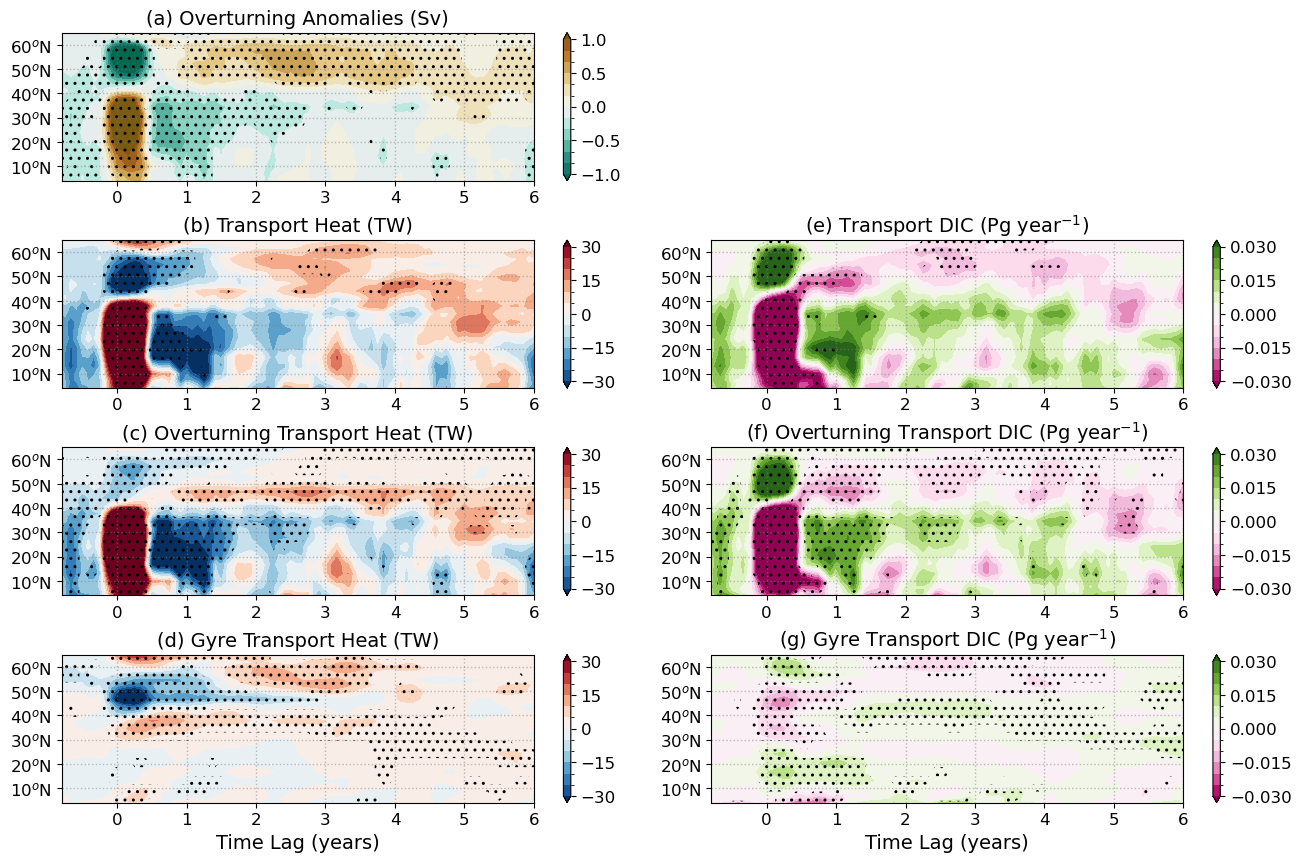

In [4]:
grid1 = plt.GridSpec(4, 2, wspace=0.1, hspace=0.4)
fig = plt.figure(figsize=[16,10])

hatch_dense = 2
fac = [1.e12, 1.e15/(12*3600*24*365)] # convert heat transport to TW and DIC transport to Pg/year
lim_vmax = [30., 0.03]
cb_map = [cmaps.MPL_RdBu_r, cmaps.MPL_PiYG]
titl_list = ['Heat (TW)', r'DIC (Pg year$^{-1}$)']
          
for i in range(0,2):
    if(i==0):
        ax = fig.add_subplot(grid1[i, 0])
        tmp = ds[i]['Overturning_z'].isel(lev=45)/1.e6
        tmp_cfd = (ds[i]['Overturning_z_confidence_upper'] - 
                   ds[i]['Overturning_z_confidence_lower']).isel(lev=45) * 0.5/1.e6 # in Sv
        p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 13, vmin = -1., vmax = 1.,
                          cmap=cmaps.NEO_div_vegetation_c_r, add_labels=False, add_colorbar=False, extend='both')
        ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                    levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])
        ax.set_xlim([-0.8, 6.]);
        ax.set_ylim([4., 65.]);
        ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
        plt.yticks(np.arange(10,61,10), [r'$10^o$N', r'$20^o$N', r'$30^o$N', r'$40^o$N', 
                                         r'$50^o$N', r'$60^o$N'], fontsize = 12);
        plt.xticks(fontsize = 12);
        cb = fig.colorbar(p, ax=ax, ticks=[-1, -0.5, 0, 0.5, 1], extend='both')
        cb.ax.tick_params(labelsize=12)
        ax.set_title('(a) Overturning Anomalies (Sv)', fontsize=14)

    # overturning tracer transport
    ax = fig.add_subplot(grid1[2,i])
    tmp = ds[i][var_list[i] + '_Transport_overturning']/fac[i]
    tmp_cfd = (ds[i][var_list[i] + '_Transport_overturning_confidence_upper'] - 
               ds[i][var_list[i] + '_Transport_overturning_confidence_lower']) * 0.5/fac[i]
    p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 13, vmin = -lim_vmax[i], vmax = lim_vmax[i],
                      cmap=cb_map[i], add_labels=False, add_colorbar=False, extend='both')
    ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5,2.], hatches=[hatch_dense*'.'])
    cb = fig.colorbar(p, ax=ax, ticks=[-lim_vmax[i], -lim_vmax[i]/2, 0, lim_vmax[i]/2., lim_vmax[i]], extend='both')
    cb.ax.tick_params(labelsize=12)
    ax.set_xlim([-0.8, 6.]);
    ax.set_ylim([4., 65.]);
    ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
    plt.yticks(np.arange(10,61,10), [r'$10^o$N', r'$20^o$N', r'$30^o$N', r'$40^o$N', 
                                     r'$50^o$N', r'$60^o$N'], fontsize = 12);
    plt.xticks(fontsize = 12);
    ax.set_title('(' + chr(97+3*i+2) + ') Overturning Transport ' + titl_list[i], fontsize=14)
    
    # gyre tracer transport
    ax = fig.add_subplot(grid1[3,i])
    tmp = ds[i][var_list[i] + '_Transport_gyre']/fac[i] # in PW
    tmp_cfd = (ds[i][var_list[i] + '_Transport_gyre_confidence_upper'] - 
               ds[i][var_list[i] + '_Transport_gyre_confidence_lower']) * 0.5/fac[i]
    p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 13, vmin = -lim_vmax[i], vmax = lim_vmax[i],
                      cmap=cb_map[i], add_labels=False, add_colorbar=False, extend='both')
    ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])
    cb = fig.colorbar(p, ax=ax, ticks=[-lim_vmax[i], -lim_vmax[i]/2, 0, lim_vmax[i]/2., lim_vmax[i]], extend='both')
    cb.ax.tick_params(labelsize=12)
    ax.set_xlim([-0.8, 6.]);
    ax.set_ylim([4., 65.]);
    ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
    plt.yticks(np.arange(10,61,10), [r'$10^o$N', r'$20^o$N', r'$30^o$N', r'$40^o$N', 
                                     r'$50^o$N', r'$60^o$N'], fontsize = 12);
    plt.xticks(fontsize = 12);
    ax.set_xlabel('Time Lag (years)', fontsize=14)
    ax.set_title('(' + chr(97+3*i+3) + ') Gyre Transport ' + titl_list[i], fontsize=14)

    # Total tracer transport
    ax = fig.add_subplot(grid1[1,i])
    tmp = ds[i][var_list[i] + '_Transport']/fac[i]
    tmp_cfd = (ds[i][var_list[i] + '_Transport_confidence_upper'] - 
               ds[i][var_list[i] + '_Transport_confidence_lower'])/fac[i]
    p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 13, vmin = -lim_vmax[i], vmax = lim_vmax[i],
                      cmap=cb_map[i], add_labels=False, add_colorbar=False, extend='both')
    ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])
    ax.set_xlim([-0.8, 6.]);
    ax.set_ylim([4., 65.]);
    ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
    plt.yticks(np.arange(10,61,10), [r'$10^o$N', r'$20^o$N', r'$30^o$N', r'$40^o$N', 
                                     r'$50^o$N', r'$60^o$N'], fontsize = 12);
    plt.xticks(fontsize = 12);
    cb = fig.colorbar(p, ax=ax, ticks=[-lim_vmax[i], -lim_vmax[i]/2, 0, lim_vmax[i]/2., lim_vmax[i]], extend='both')
    cb.ax.tick_params(labelsize=12)
    ax.set_title('(' + chr(97+3*i+1) + ') Transport ' + titl_list[i], fontsize=14)

#fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/Tracer_Transport.pdf', 
#            dpi=300,bbox_inches='tight');
#fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/Tracer_Transport.png', 
#            dpi=300,bbox_inches='tight');

## Figure: Heat and DIC budget

Heat and cabon budgets are evaluated in subpolar and subtropical regions (area-integrated adn further integrated in the upper 100 m) in the North Atlantic Ocean.

In [2]:
# upper 100 m budgets

ppdir = ("/gws/nopw/j04/unicorns/carbon_add_redis" + 
         "/Fast_SLow_NAO/MOHC/UKESM1-0-LL/historical/")

var_list = ['thetao', 'dissic']

ds = []
for var in var_list:
    d = xr.open_dataset(ppdir + "all_ensembles/Timeseries/" + var + "_Budget_new_regions_2_depth_100.nc")
    d = d.drop('time').assign_coords(time=d['time.year'] + d['time.month']/12 - 1902 + 6./12)
    ds.append(d)

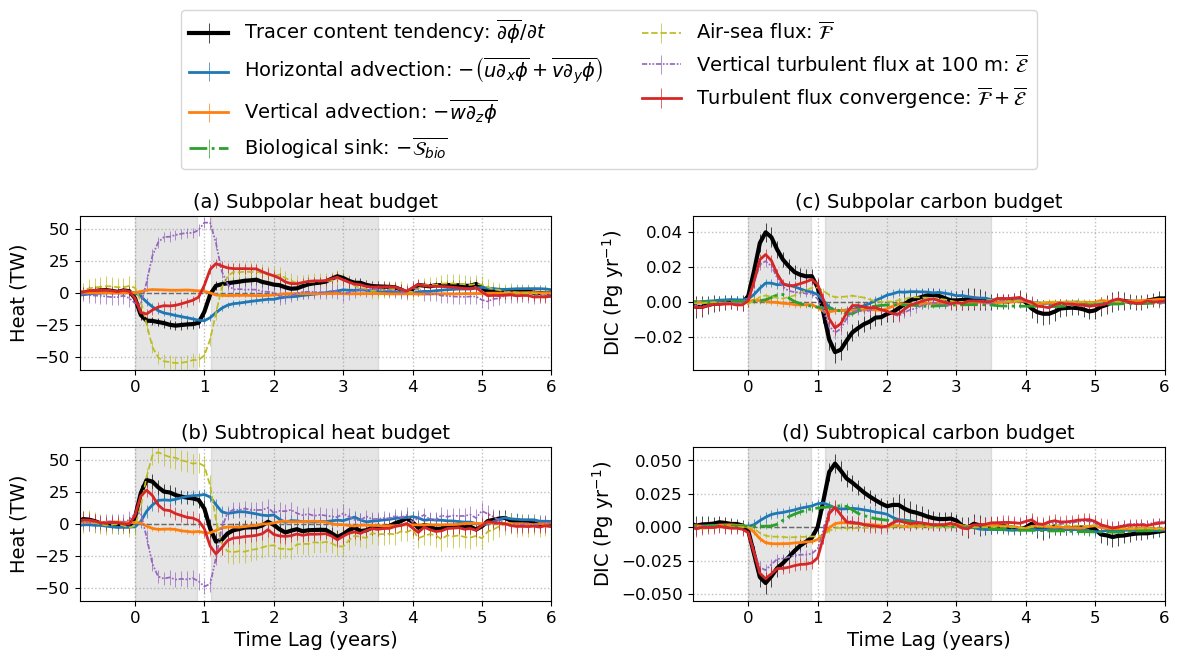

In [32]:
region_list = ['_North_Atlantic_Subpolar', '_North_Atlantic_Subtropical']
reg_lab = [r'Subpolar', r'Subtropical']


fac = [1./1e12, 1000. * 1.e-15 * 3600*24*365] # convert heat budget in terawatts (from watts) and DIC budget in Pg/year (from kg/s)

label_tend = [r'Tracer content tendency: ${\overline{\partial \phi}/\partial t}$', 
              r'Tracer content tendency: ${\overline{\partial \phi}/\partial t}$']
label_hor = [r'Horizontal advection: $-\left(\overline{u\partial_x\phi} + \overline{v\partial_y\phi} \right)$',
             r'Horizontal advection: $-\left(\overline{u\partial_x\phi} + \overline{v\partial_y\phi} \right)$']
label_ver = [r'Vertical advection: $-\overline{w\partial_z\phi}$',
             r'Vertical advection: $-\overline{w\partial_z\phi}$']

grid1 = plt.GridSpec(2, 2, wspace=0.3, hspace=0.5)
fig = plt.figure(figsize=[14,5])

for i in range(0,2):
    j = 0
    for region in region_list:
        ax = fig.add_subplot(grid1[j, i])
        # 95% confidence interval (+- yerr = (upper-bound -lower_bound)*0.5 = 2*standard_error)
        ax.errorbar(ds[i]['time'], ds[i]['dt_' + var_list[i] + region]* fac[i], 
                    yerr = (ds[i]['dt_' + var_list[i] + region + '_confidence_upper'] 
                            - ds[i]['dt_' + var_list[i] + region + '_confidence_lower'])* fac[i]*0.5, #0.5 factor proper errorbars
                    lw=3.0, elinewidth=0.5, label= label_tend[i], color='black')

        ax.errorbar(ds[i]['time'], ds[i][var_list[i] + '_hor_div' + region]* fac[i], 
                    yerr = (ds[i][var_list[i] + '_hor_div' + region + '_confidence_upper'] -
                           ds[i][var_list[i] + '_hor_div' + region + '_confidence_lower'])* fac[i] * 0.5, 
                    lw=2., elinewidth=0.5, label= label_hor[i], color='tab:blue')

        ax.errorbar(ds[i]['time'], ds[i][var_list[i] + '_ver_div' + region]* fac[i], 
                    yerr = (ds[i][var_list[i] + '_ver_div' + region + '_confidence_upper'] -
                           ds[i][var_list[i] + '_ver_div' + region + '_confidence_lower'])* fac[i] * 0.5, 
                    lw=2., elinewidth=0.5, label= label_ver[i], color='tab:orange')

            
        if(i==0):
            ax.errorbar(ds[i]['time'], ds[i]['hfds' + region]* fac[i], 
                        yerr = (ds[i]['hfds' + region + '_confidence_upper'] - 
                                ds[i]['hfds' + region + '_confidence_lower'])* fac[i]*0.5, color='tab:olive',
                        lw=1.25, elinewidth=0.5, ls='--', label= r'Air-sea flux: $\overline{\mathcal{F}}$') 
            
            ax.errorbar(ds[i]['time'], ds[i][var_list[i]+ '_res' + region]* fac[i], 
                        yerr = (ds[i][var_list[i]+ '_res' + region + '_confidence_upper'] -
                                ds[i][var_list[i]+ '_res' + region + '_confidence_lower'])* fac[i]*0.5, ls=(0, (3, 1, 1, 1,1, 1)), 
                        lw=1.25, elinewidth=0.5, label=r'Vertical turbulent flux at 100 m: $\overline{\mathcal{E}}$', color='tab:purple')

            tmp = ds[i][var_list[i]+'_vert_flx_conv'+ region] * fac[i]
            
            ax.errorbar(ds[i]['time'], tmp, lw=2., 
                        yerr = (ds[i][var_list[i]+'_vert_flx_conv' + region + '_confidence_upper'] - 
                                ds[i][var_list[i]+'_vert_flx_conv' + region + '_confidence_lower'])* fac[i]*0.5,
                        elinewidth=0.5, color='tab:red', 
                        label=r'Turbulent flux convergence: $\overline{\mathcal{F}} + \overline{\mathcal{E}}$')
            
            #if(j==1):
            #    plt.legend(loc='upper right', bbox_to_anchor=(1., 3.4), ncol=2, fontsize=14);
                
        else:
            ax.errorbar(ds[i]['time'], ds[i]['particulate_flux' + region]* fac[i], 
                        yerr = (ds[i]['particulate_flux' + region + '_confidence_upper'] -
                                ds[i]['particulate_flux' + region + '_confidence_lower'])* fac[i]*0.5, ls='-.', 
                        lw=2., elinewidth=0.5, label=r'Biological sink: $-\overline{\mathcal{S}_{bio}}$', color='tab:green')
            
            ax.errorbar(ds[i]['time'], ds[i]['fgco2' + region]* fac[i], 
                        yerr = (ds[i]['fgco2' + region + '_confidence_upper'] - 
                                ds[i]['fgco2' + region + '_confidence_lower'])* fac[i]*0.5, color='tab:olive',
                        lw=1.25, elinewidth=0.5, ls='--', label= r'Air-sea flux: $\overline{\mathcal{F}}$')

            
            ax.errorbar(ds[i]['time'], ds[i][var_list[i]+ '_res_bio' + region]* fac[i], color='tab:purple',
                        yerr = (ds[i][var_list[i]+ '_res_bio' + region + '_confidence_upper'] -
                                ds[i][var_list[i]+ '_res_bio' + region + '_confidence_lower'])* fac[i]*0.5, 
                        ls=(0, (3, 1, 1, 1,1, 1)), 
                        lw=1.25, elinewidth=0.5, label=r'Vertical turbulent flux at 100 m: $\overline{\mathcal{E}}$')

            tmp = ds[i][var_list[i]+'_vert_flx_conv'+ region] * fac[i]
            
            ax.errorbar(ds[i]['time'], tmp, lw=2., 
                        yerr = (ds[i][var_list[i]+'_vert_flx_conv' + region + '_confidence_upper'] - 
                                ds[i][var_list[i]+'_vert_flx_conv' + region + '_confidence_lower'])* fac[i]*0.5,
                        elinewidth=0.5, color='tab:red',
                        label=r'Turbulent flux convergence: $\overline{\mathcal{F}} + \overline{\mathcal{E}}$')
            
            
            if(j==1):
                plt.legend(loc='upper right', bbox_to_anchor=(0.75, 3.9), ncol=2, fontsize=14);
            
        ax.set_xlim([-0.8, 6.]);
        plt.xticks(fontsize = 12); plt.yticks(fontsize = 12);
        ax.axhline(y=0, ls='--', lw=1, color='dimgrey')
        ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
        ax.axvspan(0., 0.9, alpha=0.2, color='gray')
        ax.axvspan(1.1, 3.5, alpha=0.2, color='gray')
        
        if(j==1):
            ax.set_xlabel('Time Lag (years)', fontsize=14)
            #plt.legend(loc='upper right', bbox_to_anchor=(1.0, 3.6), ncol=3, fontsize=14);

        if(i==0):
            ax.set_ylabel('Heat (TW)', fontsize=14)
            ax.set_ylim([-60., 60.]);
            plt.yticks(np.arange(-50,60,25))
            ax.set_title('(' + chr(97+j) + ') ' + reg_lab[j] + ' heat budget', fontsize=14)
        else:
            ax.set_ylabel(r'DIC (Pg yr$^{-1}$)', fontsize=14)
            #ax.set_ylim([-0.05, 0.05]);
            #plt.yticks(np.arange(-0.04,0.05,0.02))
            ax.set_title('(' + chr(99+j) + ') ' + reg_lab[j] + ' carbon budget', fontsize=14)
        
        j = j + 1

fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/Tracer_Budget.pdf', 
            dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/Tracer_Budget.png', 
            dpi=300,bbox_inches='tight');


### Figure: PO4 budget and meridional transport

Anomalies in phosphate budgets and transport are evaluated in subpolar and subtropical regions (area-integrated adn further integrated in the upper 100 m) in the North Atlantic Ocean.

In [9]:
ppdir = ("/gws/nopw/j04/unicorns/carbon_add_redis" + 
         "/Fast_SLow_NAO/MOHC/UKESM1-0-LL/historical/")

var_list = ['po4']

ds = []
for var in var_list:
    d = xr.open_dataset(ppdir + "all_ensembles/Timeseries/" + var + "_Budget_new_regions_2_depth_100.nc")
    d = d.drop('time').assign_coords(time=d['time.year'] + d['time.month']/12 - 1902 + 6./12)
    ds.append(d)

ds1 = xr.open_dataset(ppdir + "all_ensembles/Timeseries/po4_Transport_Atlantic.nc")
ds1 = ds1.drop('time').assign_coords(time=ds1['time.year'] + ds1['time.month']/12 - 1902)
ds1 = ds1.assign_coords(lat=ds1['latitude'].values)

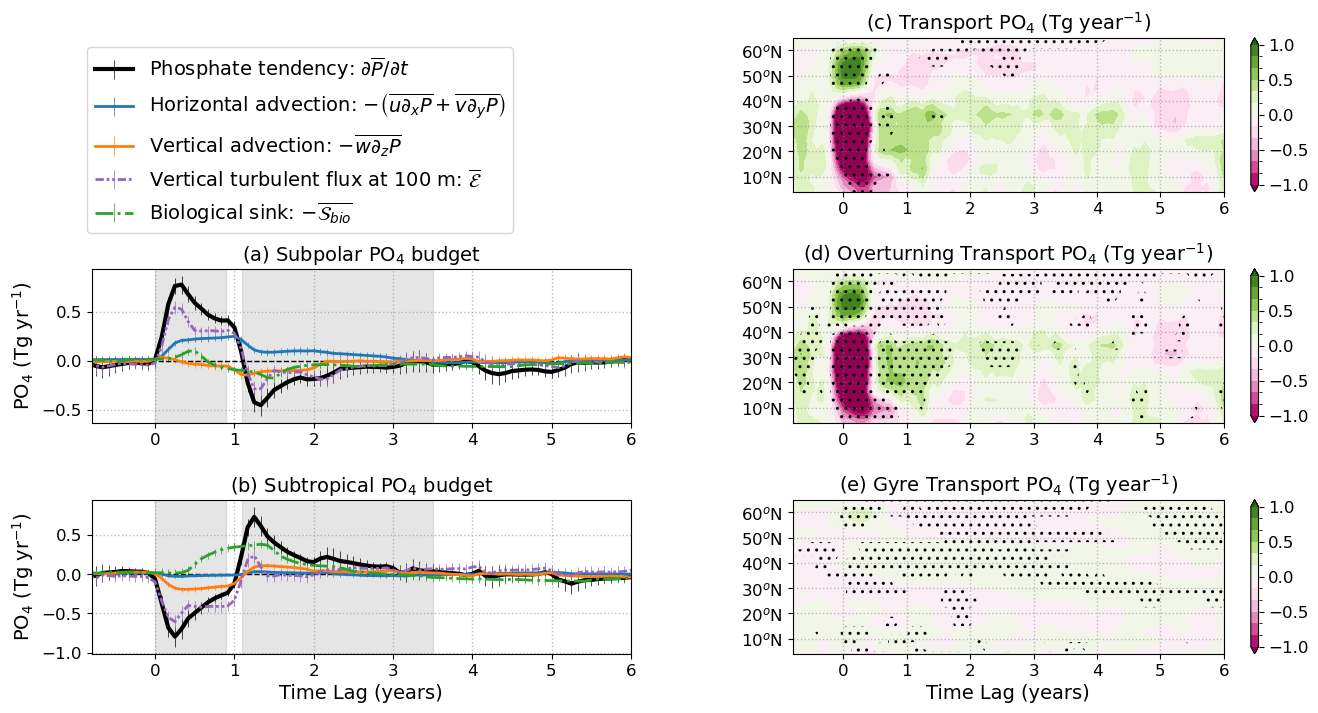

In [20]:
region_list = ['_North_Atlantic_Subpolar', '_North_Atlantic_Subtropical']
reg_lab = [r'Subpolar', r'Subtropical']


fac = [1000. * 1.e-12 * 3600*24*365] # convert po4 budget in Pg/year (from kg/s)

label_tend = [r'Phosphate tendency: ${\partial \overline{P}/\partial t}$']
label_hor = [r'Horizontal advection: $-\left(\overline{u\partial_xP} + \overline{v\partial_yP} \right)$']
label_ver = [r'Vertical advection: $-\overline{w\partial_zP}$']

grid1 = plt.GridSpec(3,2, wspace=0.3, hspace=0.5)
fig = plt.figure(figsize=[16,8])

for i in range(0,1):
    j = 0
    for region in region_list:
        ax = fig.add_subplot(grid1[j+1, i])
        ax.errorbar(ds[i]['time'], ds[i]['dt_' + var_list[i] + region]* fac[i], 
                    yerr = (ds[i]['dt_' + var_list[i] + region + '_confidence_upper'] 
                            - ds[i]['dt_' + var_list[i] + region + '_confidence_lower'])* fac[i]*0.5, #0.5 factor proper errorbars
                    lw=3., elinewidth=0.5, label= label_tend[i], color='black')
        
        ax.errorbar(ds[i]['time'], ds[i][var_list[i] + '_hor_div' + region]* fac[i], 
                    yerr = (ds[i][var_list[i] + '_hor_div' + region + '_confidence_upper'] -
                           ds[i][var_list[i] + '_hor_div' + region + '_confidence_lower'])* fac[i] * 0.5, 
                    lw=2., elinewidth=0.5, label= label_hor[i], color='tab:blue')
        ax.errorbar(ds[i]['time'], ds[i][var_list[i] + '_ver_div' + region]* fac[i], 
                    yerr = (ds[i][var_list[i] + '_ver_div' + region + '_confidence_upper'] -
                           ds[i][var_list[i] + '_ver_div' + region + '_confidence_lower'])* fac[i] * 0.5, 
                    lw=2., elinewidth=0.5, label= label_ver[i], color='tab:orange')


        ax.errorbar(ds[i]['time'], ds[i][var_list[i]+ '_res_bio' + region]* fac[i], 
                    yerr = (ds[i][var_list[i]+ '_res_bio' + region + '_confidence_upper'] -
                            ds[i][var_list[i]+ '_res_bio' + region + '_confidence_lower'])* fac[i]*0.5, ls=(0, (3, 1, 1, 1,1, 1)), 
                    lw=2., elinewidth=0.5, label=r'Vertical turbulent flux at 100 m: $\overline{\mathcal{E}}$', color='tab:purple')
        ax.errorbar(ds[i]['time'], ds[i]['particulate_flux' + region]* fac[i], 
                    yerr = (ds[i]['particulate_flux' + region + '_confidence_upper'] -
                            ds[i]['particulate_flux' + region + '_confidence_lower'])* fac[i]*0.5, ls='-.', 
                    lw=2., elinewidth=0.5, label=r'Biological sink: $-\overline{\mathcal{S}_{bio}}$', color='tab:green')

        ax.set_xlim([-0.8, 6.]);
        plt.xticks(fontsize = 12); plt.yticks(fontsize = 12);
        ax.axhline(y=0, ls='--', lw=1, color='k')
        ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
        ax.axvspan(0., 0.9, alpha=0.2, color='gray')
        ax.axvspan(1.1, 3.5, alpha=0.2, color='gray')
        
        if(j==1):
            ax.set_xlabel('Time Lag (years)', fontsize=14)
            plt.legend(loc='upper right', bbox_to_anchor=(0.8, 4.0), ncol=1, fontsize=14);


        ax.set_ylabel(r'PO$_4$ (Tg yr$^{-1}$)', fontsize=14)
        #ax.set_ylim([-0.05, 0.05]);
        #plt.yticks(np.arange(-0.04,0.05,0.02))
        ax.set_title('(' + chr(97+j) + ') ' + reg_lab[j] + ' PO$_4$ budget', fontsize=14)
        
        j = j + 1


# overturning tracer transport
fac = 1.e12/(31*3600*24*365) # convert to Tera-gm/year
lim_vmax = 1.0
cb_map = cmaps.MPL_PiYG
titl_list = r'PO$_4$ (Tg year$^{-1}$)'
hatch_dense = 2

ax = fig.add_subplot(grid1[1,1])
tmp = ds1['po4_Transport_overturning']/fac
tmp_cfd = (ds1['po4_Transport_overturning_confidence_upper'] - 
           ds1['po4_Transport_overturning_confidence_lower']) * 0.5/fac
p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 13, vmin = -lim_vmax, vmax = lim_vmax,
                      cmap=cb_map, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
            levels=[.5,1.,1.5,2.], hatches=[hatch_dense*'.'])
cb = fig.colorbar(p, ax=ax, ticks=[-lim_vmax, -lim_vmax/2, 0, lim_vmax/2., lim_vmax], 
                                   extend='both')
cb.ax.tick_params(labelsize=12)
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([4., 65.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.yticks(np.arange(10,61,10), [r'$10^o$N', r'$20^o$N', r'$30^o$N', r'$40^o$N', 
                                r'$50^o$N', r'$60^o$N'], fontsize = 12);
plt.xticks(fontsize = 12);
ax.set_title('(d) Overturning Transport ' + titl_list, fontsize=14)
    
# gyre tracer transport
ax = fig.add_subplot(grid1[2,1])
tmp = ds1['po4_Transport_gyre']/fac # in PW
tmp_cfd = (ds1['po4_Transport_gyre_confidence_upper'] - 
            ds1['po4_Transport_gyre_confidence_lower']) * 0.5/fac
p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 13, vmin = -lim_vmax, vmax = lim_vmax,
                      cmap=cb_map, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
            levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])
cb = fig.colorbar(p, ax=ax, ticks=[-lim_vmax, -lim_vmax/2, 0, lim_vmax/2., lim_vmax], extend='both')
cb.ax.tick_params(labelsize=12)
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([4., 65.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.yticks(np.arange(10,61,10), [r'$10^o$N', r'$20^o$N', r'$30^o$N', r'$40^o$N', 
                                r'$50^o$N', r'$60^o$N'], fontsize = 12);
plt.xticks(fontsize = 12);
ax.set_xlabel('Time Lag (years)', fontsize=14)
ax.set_title('(e) Gyre Transport ' + titl_list, fontsize=14)

# Total tracer transport
ax = fig.add_subplot(grid1[0,1])
tmp = ds1['po4_Transport']/fac
tmp_cfd = (ds1['po4_Transport_confidence_upper'] - 
            ds1['po4_Transport_confidence_lower'])/fac
p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 13, vmin = -lim_vmax, vmax = lim_vmax,
                      cmap=cb_map, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
            levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([4., 65.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.yticks(np.arange(10,61,10), [r'$10^o$N', r'$20^o$N', r'$30^o$N', r'$40^o$N', 
                                r'$50^o$N', r'$60^o$N'], fontsize = 12);
plt.xticks(fontsize = 12);
cb = fig.colorbar(p, ax=ax, ticks=[-lim_vmax, -lim_vmax/2, 0, lim_vmax/2., lim_vmax], extend='both')
cb.ax.tick_params(labelsize=12)
ax.set_title('(c) Transport ' + titl_list, fontsize=14)
    
fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/PO4_Budget.pdf', 
            dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/PO4_Budget.png', 
            dpi=300,bbox_inches='tight');
